In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df = pd.read_csv("C:\\Users\\PMLS\\pandas\\titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [2]:
df.shape

(891, 4)

In [3]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [4]:
x=df.drop(columns=["Survived"])
y=df["Survived"]
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)


In [8]:
mean_age=x_train["Age"].mean()
median_age=x_train["Age"].median()

mean_fare=x_train["Fare"].mean()
median_fare=x_train["Fare"].median()

In [17]:
x_train["Mean Age"]=x_train["Age"].fillna(mean_age)
x_train["Median Age"]=x_train["Age"].fillna(median_age)

x_train['Mean Fare']=x_train["Fare"].fillna(mean_fare)
x_train["Median Fare"]=x_train['Fare'].fillna(median_fare)

In [18]:
x_train.sample(5)

,Age,Fare,Family,Mean Age,Median Age,Mean Fare,Medain Fare,Median Fare
254,41.0,20.2125,2,41.000000,41.0,20.2125,20.2125,20.2125
680,NaN,8.1375,0,29.640297,28.0,8.1375,8.1375,8.1375
611,NaN,7.0500,0,29.640297,28.0,7.0500,7.0500,7.0500
338,45.0,8.0500,0,45.000000,45.0,8.0500,8.0500,8.0500
531,NaN,7.2292,0,29.640297,28.0,7.2292,7.2292,7.2292


In [19]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Median Age'].var())
print('Age Variance after mean imputation: ', x_train['Mean Age'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Median Fare'].var())
print('Fare Variance after mean imputation: ', x_train['Mean Fare'].var())

Original Age variable variance:  211.27502495529868
Age Variance after median imputation:  170.0993717992936
Age Variance after mean imputation:  169.67375421867163
Original Fare variable variance:  2286.5049599559184
Fare Variance after median imputation:  2179.7864476950667
Fare Variance after mean imputation:  2164.3007567515233


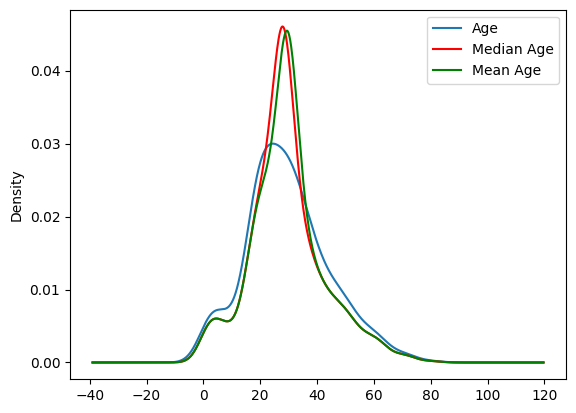

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Median Age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Mean Age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

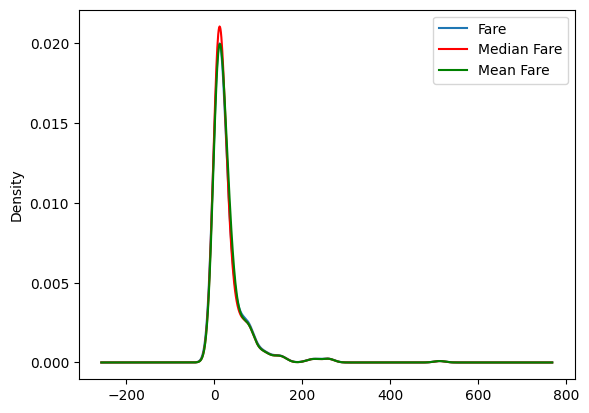

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Median Fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Mean Fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
x_train.cov()

,Age,Fare,Family,Mean Age,Median Age,Mean Fare,Medain Fare,Median Fare
Age,211.275025,71.043474,-6.519937,211.275025,211.275025,67.072139,68.010622,68.010622
Fare,71.043474,2286.504960,17.397281,56.906674,60.200696,2286.504960,2286.504960,2286.504960
Family,-6.519937,17.397281,2.849468,-5.236123,-5.214142,16.467469,16.589810,16.589810
Mean Age,211.275025,56.906674,-5.236123,169.673754,169.673754,53.865248,54.618938,54.618938
Median Age,211.275025,60.200696,-5.214142,169.673754,170.099372,56.983219,57.637139,57.637139
Mean Fare,67.072139,2286.504960,16.467469,53.865248,56.983219,2164.300757,2164.300757,2164.300757
Medain Fare,68.010622,2286.504960,16.589810,54.618938,57.637139,2164.300757,2179.786448,2179.786448
Median Fare,68.010622,2286.504960,16.589810,54.618938,57.637139,2164.300757,2179.786448,2179.786448


In [23]:
x_train.corr()

,Age,Fare,Family,Mean Age,Median Age,Mean Fare,Medain Fare,Median Fare
Age,1.000000,0.094509,-0.296798,1.000000,1.000000,0.092785,0.093678,0.093678
Fare,0.094509,1.000000,0.212030,0.090715,0.095837,1.000000,1.000000,1.000000
Family,-0.296798,0.212030,1.000000,-0.238134,-0.236837,0.209694,0.210500,0.210500
Mean Age,1.000000,0.090715,-0.238134,1.000000,0.998748,0.088888,0.089811,0.089811
Median Age,1.000000,0.095837,-0.236837,0.998748,1.000000,0.093915,0.094655,0.094655
Mean Fare,0.092785,1.000000,0.209694,0.088888,0.093915,1.000000,0.996442,0.996442
Medain Fare,0.093678,1.000000,0.210500,0.089811,0.094655,0.996442,1.000000,1.000000
Median Fare,0.093678,1.000000,0.210500,0.089811,0.094655,0.996442,1.000000,1.000000


<Axes: >

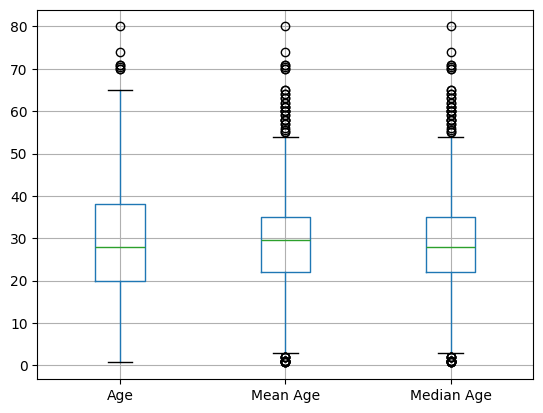

In [25]:
x_train[['Age','Mean Age','Median Age']].boxplot()

<Axes: >

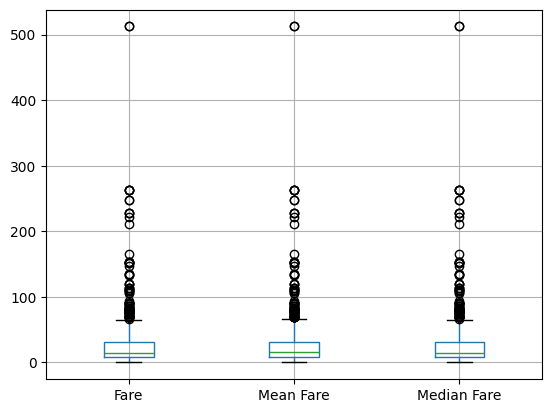

In [26]:
x_train[['Fare','Mean Fare','Median Fare']].boxplot()

Using Sklearn

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')
trf.fit(x_train)

c:\Users\PMLS\pandas\my_venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [29]:
ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [31]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])